<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Londres*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


A plataforma possui um projeto chamado [Inside Airbnb](http://insideairbnb.com/get-the-data) que disponibiliza dados e conscientiza sobre o impacto da Airbnb nas comunidades residenciais. Nesse projeto realizarei uma análise dos dados disponíveis no arquivo [listings](http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/visualisations/listings.csv) sobre a cidade de **Londres**.

Capital do Reino Unido, Londres, fica localizada a sudeste da Inglaterra, é um dos principais centros econômicos e culturais do planeta, possui elevada qualidade de vida e moderna infraestrutura de transportes e comunicações. A cidade possui quatro Patrimônios Mundiais: a Torre de Londres, os Reais Jardins Botânicos de Kew (o local que compreende o Palácio de Westminster, a Abadia de Westminster e a Igreja de Santa Margarida); já sediou os Jogos Olímpicos de 1908, 1948 e 2012.

Seu metrô é a mais extensa rede ferroviária subterrânea do mundo, o aeroporto é o aeroporto mais movimentado do mundo em número de passageiros internacionais e o espaço aéreo da cidade é o mais movimentado do qualquer outro centro urbano do mundo. Outros marcos famosos incluem o Palácio de Buckingham, a London Eye, Piccadilly Circus, a Catedral de São Paulo, a Tower Bridge, a Trafalgar Square e o The Shard. Londres é a sede de inúmeros museus, galerias, bibliotecas e outras instituições culturais, como o Museu Britânico, a National Gallery, Tate Modern e a Biblioteca Britânica.

Uma cidade tão importante globalmente atrai milhares de visitantes nacionais e estrangeiros, assim sendo vamos analisar o banco de dados fornecido pelo **Airbnb** e ver que conclusões podemos tirar deste lugar.

## Obtenção dos Dados


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Como dito, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

Para analisar/tratar esses dados iremos ultilizar a linguagem **Python**.

In [77]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [78]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/visualisations/listings.csv')


### Conjunto de dados

In [79]:
# visualizando as primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [80]:
# visualizando as últimas linhas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
69346,9671724,"Cozy room in Greenwich, river view",49977905,Kurt,NaN,Greenwich,51.48300,-0.01346,Private room,55,5,67,2021-10-03,0.84,3,0,1,NaN
69347,20277958,River view Tate Modern,1132775,Mark,NaN,Southwark,51.50914,-0.10192,Entire home/apt,201,3,61,2022-09-09,0.99,1,0,12,NaN
69348,20512703,"Luxury 4 bed house, 100m to river and palace",1706966,Asher & Aileen,NaN,Richmond upon Thames,51.40571,-0.35325,Entire home/apt,246,3,6,2022-08-31,1.49,1,4,6,NaN
69349,49698549,Waterfront Hampton Stay,34213667,Alan,NaN,Richmond upon Thames,51.41029,-0.35975,Entire home/apt,250,3,9,2022-07-18,0.61,1,2,4,NaN
69350,554172169432589107,GuestReady Gorgeous Bright 2 Br Apartment in,402191311,GuestReady,NaN,Greenwich,51.50183,0.00862,Entire home/apt,134,2,17,2022-06-20,2.45,101,85,17,NaN


#### Dicionário das variáveis

* `id` - número de *id* gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de *id* do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm`-  número de reviews que o *listing* teve nos últimos 12 meses.
* `license` - número de licença/permição/registro

### Análise Exploratória dos dados

Nesta seção conheceremos um pouco mais sobre nosso *dataset*: suas *dimensões*, o tipo de dados de cada variável, se possui valores *ausentes*, algumas *estatísticas descritivas*, veremos se existem *outliers*.


In [81]:
# Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?
print('Variáveis: {}' .format(df.shape[1]))
print('Entradas: {}'.format(df.shape[0]))

Variáveis: 18
Entradas: 69351


Criaremos um *dataframe* com as seguintes propriedades do nosso dataset:

* tipo_dados = verificar como cada variável foi interpretada.
* dados_ausente(%) = porcentagem de dados que estão faltando ou nulos.
* valores_unicos = observar quantos valores únicos cada variável possui, isso auxilia na detecção de uma variável categórica, por exemplo.

In [82]:
# resumos dos dados
pd.DataFrame({'tipos_dados':df.dtypes,
                'dados_ausentes(%)': df.isnull().mean().round(4)*100,
                'valores_unicos': df.nunique()})

,tipos_dados,dados_ausentes(%),valores_unicos
id,int64,0.00,69351
name,object,0.03,67029
host_id,int64,0.00,45229
host_name,object,0.01,13043
neighbourhood_group,float64,100.00,0
neighbourhood,object,0.00,33
latitude,float64,0.00,28647
longitude,float64,0.00,38106
room_type,object,0.00,4
price,int64,0.00,1414


`Análise`:

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as colunas `neighbourhood_group` e `license` possuem 100% dos seus valores faltantes, e portanto, podem ser descartadas.

* As variáveis `reviews_per_month` e `last_review` têm aproximadamente 24% dos valores nulos.
* Variáveis como `neigbourhood` e `room_type` possuem poucos registros e são do tipo *objeto*, isso indica que ambas podem ser variáveis do tipo categórica.
* `host_id` é uma variável categórica, mas está como inteiro.
* `Id`, `name`, `host_id`, `host_name`, `number_of_reviews_ltm` serão desconsideradas em nossa análise por conterem apenas informações de cadastro.
* `last_review` é do formato data, mas está como objeto 

In [83]:
#convertendo a variável last_review para formato data:
df['last_review'] = pd.to_datetime(df['last_review'])

In [84]:
#limpando nosso *dataset* a partir da nossa análise:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'license', 'number_of_reviews_ltm'])
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74
1,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343
2,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222
3,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236
4,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180


**Qual o tipo de distribuição das variáveis?** 

Continuando nossa análise, precisamos verificar a distruibuição das variáveis, afim de procurar alguma anomalia, como por exemplo *outliers*.

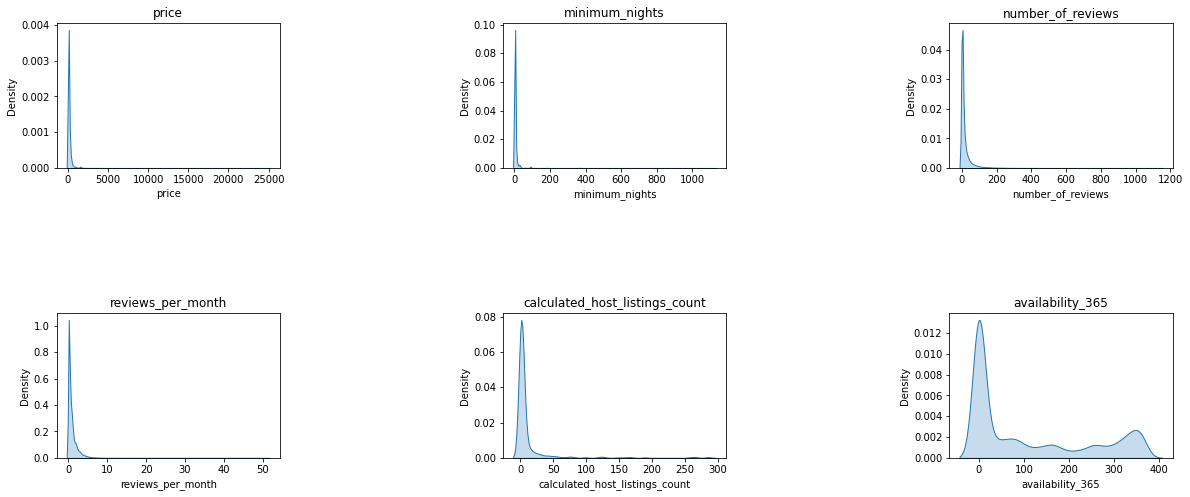

In [85]:
#plotando o gráfico densidade

#definindo as variáveis numéricas
dens_plot = df.drop(columns=['latitude', 'longitude', 'neighbourhood', 'room_type', 'last_review'])

#definindo o número de linhas e colunas
nrow = 2
ncol = 3

#definindo área de plotagem
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (20,8))
fig.subplots_adjust(hspace=1, wspace=1)

#criando loop para plotagem
idx = 0
for col in dens_plot.columns:
    idx += 1
    plt.subplot(nrow, ncol, idx)
    sns.kdeplot(dens_plot[col], shade=True)
    plt.title(col, fontsize = 12)
plt.tight_layout;


`Análise`:

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*.

*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados. Tirando a variável `avaiability_365`, onde há uma variação mais distruibuída, mas com vários picos,  todas as outras variáveis não seguem uma distruição e possuem toda a representação gráfica distorcida.\
Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`

* Plotar `boxplots` para a variável.

In [86]:
# análise do método describe.
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,69351.00,69351.00,69351.00,52571.00,69351.00,69351.00
mean,177.21,6.00,17.54,0.88,11.99,108.52
std,412.82,25.71,40.41,1.27,37.15,132.82
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,55.00,1.00,1.00,0.12,1.00,0.00
50%,100.00,2.00,4.00,0.43,1.00,32.00
75%,180.00,4.00,16.00,1.08,4.00,228.00
max,25000.00,1125.00,1141.00,51.33,285.00,365.00


`Análise`:

Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 180, porém seu valor máximo é 25000.

* 75% dos dados da `minium_nights` encontram-se abaixo de 4 noites, contudo o valor máximo chega a 1125.

* As variáveis `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `availability_365` também possuem valores *máximos* que destoam dos valores abaixo de 75%.

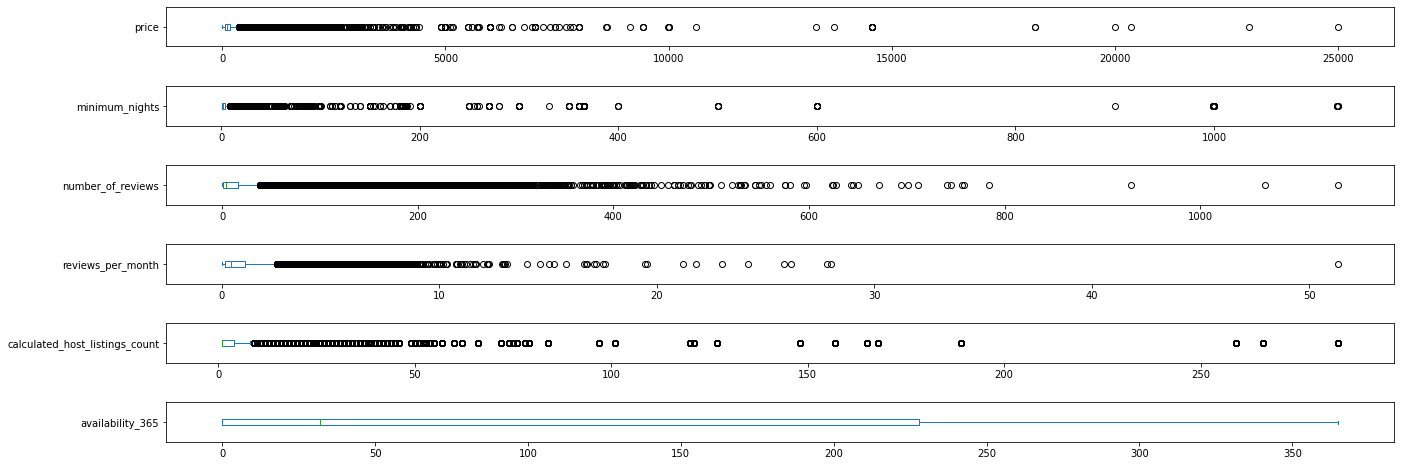

In [87]:
#plotando os boxplots

#definindo área de plotagem
fig, ax = plt.subplots(6, 1, figsize = (22,8))
fig.subplots_adjust(hspace=1, wspace=1)

#criando loop para plotagem
idx = 0
for col in dens_plot.columns:
    idx += 1
    plt.subplot(6, 1, idx)
    dens_plot[col].plot(kind="box", vert = False)
plt.tight_layout;

`Análise`:

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados. 
Observando os *boxplots* acima, podemos ver que exceto na variável `availabity_365` não há *outliers* devido a não haver dados fora da margem de aceitavél.

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do *IQR Score*.\
Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

### IQR = Q3 - Q1

Verificando os *histogramas*, a *tabela descritiva* e os *boxplots*, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.

* Calcular o IQR para as variáveis.

* Definir o limite superior e inferior para cortar os outliers.

* Remover os outliers.

In [88]:
# calculado os IQR's e os limites superiores e inferiores

dens_plot_new = dens_plot.drop(columns = ['availability_365'])

#cópia de segurança
df_clean = df.copy()

for col in dens_plot_new.columns:
    q1_col = df[col].quantile(.25)
    q3_col = df[col].quantile(.75)
    IQR_col = q3_col - q1_col
    print(f'Variável {col}')
    print('IQR da variável: ', IQR_col.round(2))

    # definindo os limites
    sup_col = q3_col + 1.5 * IQR_col
    inf_col = q1_col - 1.5 * IQR_col

    print('Limite superior: ', sup_col.round(2))
    print('Limite inferior:', inf_col.round(2))

    # ver quantidade de valores acima de 367.5 para [col]
    print(f"Existem {len(df[df[col] > sup_col])} entradas acima de {round(sup_col,2)} que representam {round(((len(df[df[col] > sup_col]) / df.shape[0])*100), 2)}% do dataset")
    print('***********************\n***********************')

    # retirando do dataset valores que ultrapassam o limite superior calculcado
    df_clean.drop(df_clean[df_clean[col] > sup_col].index, axis=0, inplace=True)
    
# retirando valores de price iguais a zero
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ', df_clean.shape)


Variável price
IQR da variável:  125.0
Limite superior:  367.5
Limite inferior: -132.5
Existem 5441 entradas acima de 367.5 que representam 7.85% do dataset
***********************
***********************
Variável minimum_nights
IQR da variável:  3.0
Limite superior:  8.5
Limite inferior: -3.5
Existem 6031 entradas acima de 8.5 que representam 8.7% do dataset
***********************
***********************
Variável number_of_reviews
IQR da variável:  15.0
Limite superior:  38.5
Limite inferior: -21.5
Existem 8318 entradas acima de 38.5 que representam 11.99% do dataset
***********************
***********************
Variável reviews_per_month
IQR da variável:  0.96
Limite superior:  2.52
Limite inferior: -1.32
Existem 4530 entradas acima de 2.52 que representam 6.53% do dataset
***********************
***********************
Variável calculated_host_listings_count
IQR da variável:  3.0
Limite superior:  8.5
Limite inferior: -3.5
Existem 11908 entradas acima de 8.5 que representam 17.17

Após os cortes reduzimos em quase 40% do nosso data set (de 69351 para 41576).
Vamos plotar novamente os boxplots e ver o quanto melhorou relação aos *outliers*.

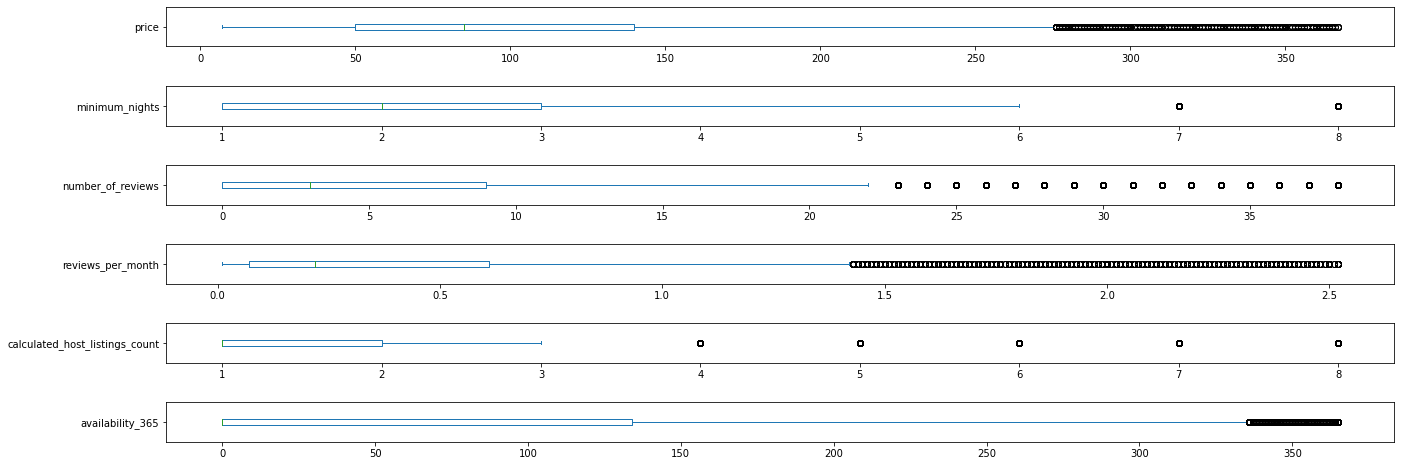

In [89]:
#plotando os boxplots

#definindo área de plotagem
fig, ax = plt.subplots(6, 1, figsize = (22,8))
fig.subplots_adjust(hspace=1, wspace=1)

#criando loop para plotagem
idx = 0
for col in dens_plot.columns:
    idx += 1
    plt.subplot(6, 1, idx)
    df_clean[col].plot(kind="box", vert = False)
plt.tight_layout;

Com base na longitude e latidude, vamos plotar os pontos um um mapa com uso da biblioteca `plotly`:

In [90]:
# plotando o mapa
fig = px.scatter_mapbox(df_clean, lat = 'latitude', lon = 'longitude', height=500, opacity = 0.6)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Qual a correlação existente entre as variáveis?

Correlação significa que existe uma relação entre duas coisas. Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela, para identificar as correlações existentes entre as variáveis de interesse, vou:

* Gerar um *heatmap* a partir da matriz de correlação, usando a biblioteca `seaborn`

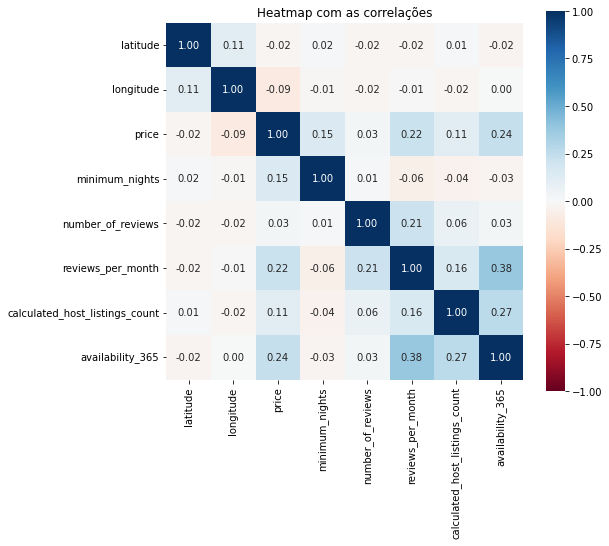

In [91]:
# plotando um heatmap a partir das correlações

#definindo área de plotagem
figure = plt.figure(figsize=(8,7))

sns.heatmap(df_clean.corr(), annot=True, cmap = 'RdBu', linecolor= 'white', fmt = '.2f', square = True, vmin = -1.0, vmax = 1.0)
plt.title('Heatmap com as correlações')
plt.show();

#### **Vamos analisar mais especificamente alguns pontos, respondendo as seguintes perguntas:**

* Qual a média de preços de aluguel?
* Quais as regiões mais caras?
* Quais os tipos de quartos mais alugados?
* Como o número de locais listados e os preços dos quartos/apartamentos variam de acordo com a região?

**Qual a média dos preços de aluguel?**

In [92]:
# ver a média da coluna `price`
print('Na cidade de Londres o valor médio dos alugueis é:', round(df_clean.price.mean(),2))

Na cidade de Londres o valor médio dos alugueis é: 104.43


**Quais as regiões mais caras?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`.

No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [93]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending = False)

neighbourhood
Kensington and Chelsea    154.15
City of London            149.36
Westminster               146.17
Camden                    124.18
Richmond upon Thames      122.81
Hammersmith and Fulham    116.79
Wandsworth                111.37
Islington                 105.06
Southwark                 103.46
Merton                    102.64
Lambeth                   101.39
Brent                      99.78
Newham                     96.55
Hackney                    95.99
Greenwich                  94.64
Bromley                    94.39
Barnet                     94.06
Tower Hamlets              93.41
Kingston upon Thames       93.17
Hounslow                   92.28
Ealing                     88.55
Waltham Forest             85.84
Redbridge                  84.88
Harrow                     84.78
Barking and Dagenham       83.28
Haringey                   83.24
Enfield                    83.23
Hillingdon                 82.66
Lewisham                   82.44
Havering                   81

A região com o maior valor médio é **City of London** e a menor é **Bexley**.

**Quais os tipos de quartos mais alugados?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [94]:
df_clean.groupby('room_type').agg({'room_type': 'count', 'price': 'mean'}).sort_values(by='price', ascending=False).round(2)


,room_type,price
room_type,,
Hotel room,78,166.32
Entire home/apt,22780,141.08
Shared room,264,61.17
Private room,18454,59.55


`Casas/apartamentos` e `quartos inteiro` lideram os tipos mais procurados, enquanto `hoteis` são os menos. Talvez a razão para isso seja que, em média o preço para se alugar `hotel` seja mais caro do que uma `casa/apartamento` e muito mais caro que um `quarto inteiro`.

Vou plotar um scatterplot com latitude e longitude, separando os pontos por cor para termos uma idéia da distribuição. Já vimos no mapa que a concentação maior de locais alugados são no centro da cidade.

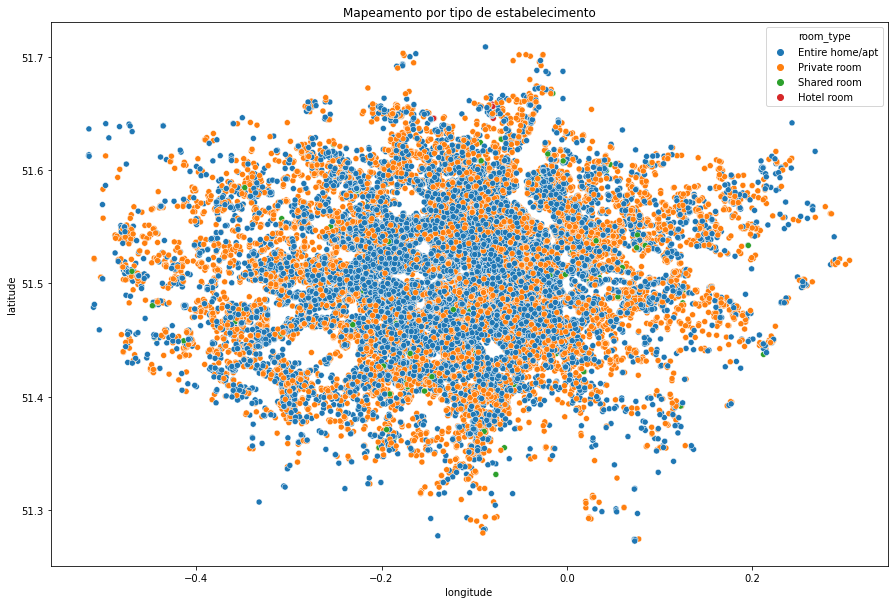

In [95]:
# definindo a área de plotagem
fig = plt.figure(figsize = (15,10))

# plotando o gráfico
sns.scatterplot(data=df_clean, y="latitude", x="longitude", hue='room_type', hue_order= ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
                        )
plt.title('Mapeamento por tipo de estabelecimento')
plt.show()

Antes de finalizarmos, vamos contar quantas vezes cada bairro aparece em nosso dataset.\
Para isso utilizaremos a função **countplot** do seaborn.

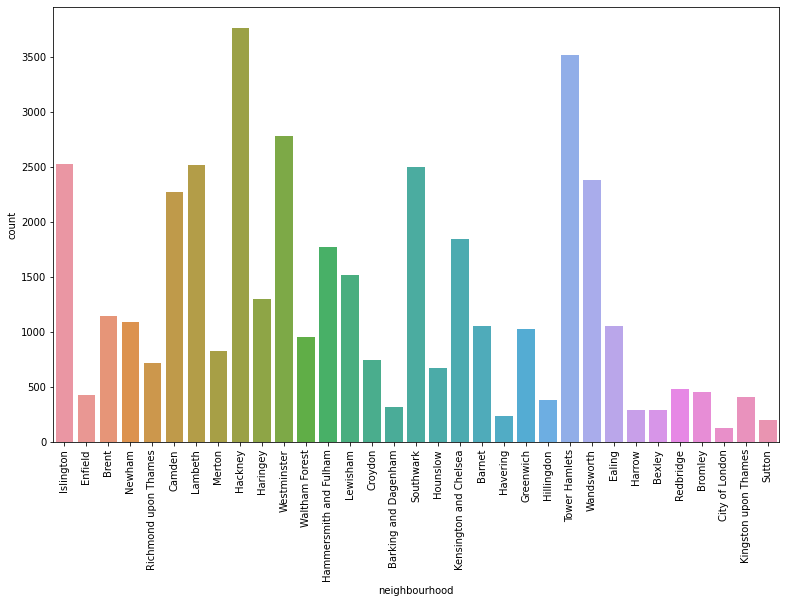

In [96]:
fig = plt.figure(figsize=(13,8))
ax = sns.countplot(x = 'neighbourhood', data=df_clean)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90 );

É possível observar que em relação aos bairros o dataset está **desbalanceado**, não havendo uma proporção razoável entre a quantidade de cada lugar. Isso de alguma maneira implica em nossos resultados.